# 예측변수 반영 

실제 사회에서 통용되는 데이터는 대개 무수히 많은 서로 다른 데이터로 구성된 복잡한 행렬로 구성된다. 행렬의 크기는 nxp로 n은 행렬의 개수, p는 열의 개수를 나타낸다. 

파이썬에서는 다음과 같은 두 가지 방법으로 행렬을 생성할 수 있다.


In [1]:
import numpy as np

In [2]:
#출력 한 번에 나올 수 있게 설정
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
#1 리스트 안에 리스트를 변환하는 방법으로 안에 있는 리스트 각 각은 행이 된다.
multiple_feature_matrix = np.array([[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15]])
multiple_feature_matrix

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [4]:
#2 우선 값을 부여하고 행과 열을 따로 지정해주는 방식
vector = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
multiple_feature_matrix = vector.reshape((3,5))
multiple_feature_matrix

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]])

In [5]:
#Tip Numpy에는 1행렬과 0행렬을 신속하게 생성할 수 있는 함수가 있다. 인수로 원하는 (x, y) 모양을 지정하면 된다. 

all_zeros=np.zeros((5,3))
all_ones=np.ones((5,3))

all_zeros
all_ones

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

## 단순선형회귀를 위한 준비

데이터셋은 예측변수와 때로는 응답변수를 포함하는 데이터 구조다. 머신 러닝 목적을 위해, 데이터셋은 행과 열로 된 테이블 모양의 행렬 형태로 구조화되거나 반 구조화될 수 있다. 

간단 선형회귀분석을 위해 부동산 평가와 관련된 몇 개의 데이터셋을 선택한다. 
부동산은 인구 조사를 통해 자유롭게 이용할 수 있는 데이터가 상당히 많고 공개돼 있으며, 심지어 시장 및 공급을 모니터링하는 웹사이트로부터 더 많은 데이터를 가져올 수 있기 때문에 자동 예측 모델에서 꽤 흥미로운 주제가 된다. 또한 주택을 빌리거나 사는 것은 수 많은 개인에게 경제적으로 중요한 결정 문제이기 때문에, 이용할 수 있는 많은 양의 정보를 수집하고 판단하게 도와주는 온라인 서비스는 좋은 비즈니스 모델이 된다. 


*-> 데이터의 접근성(또는 공개여부)에 독립변수를 선택함에 있어서 편향이 발생하는 것이 아닐까 우려된다. 종속변수를 더 잘 설명해줄 수 있는 독립변수가 어딘가에 존재함에도 연구자의 시야에 들어가지 못하거나 들어가더라도 해당 데이터를 추출할 수 없는 경우, 모형의 설명력이 떨어지는 것 아닐까 *


### Data1
*   1970년도 인구 조사로부터 가져온 보스턴의 506개 인구조사 구역
*   부동산 가치에 영향을 줄 수 있는 다양한 측면에 관한 21개의 특성변수
*   목표변수는 수천 달러(USD)로 표시되는 주택의 Median이다.
*   특성변수는 방의 개수, 건물 연식, 이웃의 범죄 수준, 오염 농도, 인근 학교와의 접근성, 고속도로 접근성, 취업 센터와의 거리 등


### Data2
*   Carnegie mellon University Statlib repository의 데이터 셋
*   1990년 미국 인구 조사에서 파생된 20,640개의 관찰 결과 포함
*   각 각의 관찰은 지리적으로 밀접한 지역에 사는 1425명의 특정 블록 그룹에 관한 일련의 통계값이다.
*   9개의 예측변수 사용
*   목표변수는 해당 블록의 주택값을 나타내는 지표
*   예측 변수는 중간 소득

두 번째 데이터셋은 1997년 Pace & Barry의 <Sparse Spatial Autoregressions, Statistics and Probability Letters>에 사용되었다. 여기에서 공간변수란 분석에 있어 다른 위치에 대한 상대적인 위치 표시와 근접성을 나타내기 위한 위치 정보를 의미한다. 이런 데이터셋은 인구, 건물의 밀도, 지역별로 집계된 인구밀도 등을 나타내는 외부 변수에 의해 주택 가치가 변동될 수 있다는 배경을 가지고 있다.













In [6]:
#data download

from sklearn.datasets import fetch_california_housing
from sklearn.datasets import load_boston
boston = load_boston()
california = fetch_california_housing()

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib as mpl

In [8]:
dataset = pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['target']=boston.target

가장 간단한 모델은 단순선형회귀가 아니라 통계적 평균이다. 평균은 데이터 요약을 설명하는 강력한 숫자이다. 정규적으로 분포된 데이터에서는 평균이 데이터의 중심을 잘 나타내기 때문에 잘 작동하지만, 그렇지 않은 분포의 데이터에서는 적합하지 않을 수 있다. 

정규분포 곡선은 대칭적이며 높이와 산포와 관련해 특정한 특성을 갖는 데이터 분포다.
분포가 정규인 것을 파악하기 위한 핵심은 분포에서 값의 확률을 설명하는 함수인 확률 밀도함수(Probability Density Function)이다. 

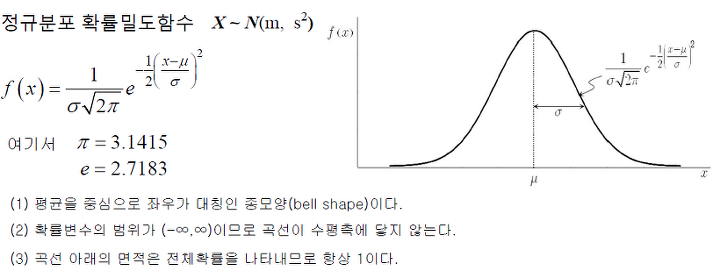

표본공간 위에 정의된 실수값 함수를 확률변수라 하고, 확률변수 X의 값에 따라 확률이 어떻게 흩어져 있는지를 합이 1인 양수로써 나타낸 것을 X의 확률분포라고 한다. 


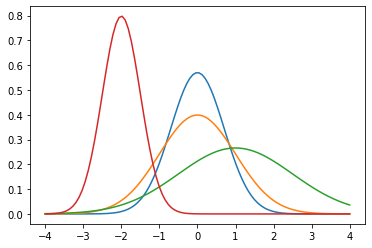

In [9]:
from scipy.stats import norm
import math
x = np.linspace(-4, 4, 100)
for mean, variance in [(0, 0.7), (0, 1), (1, 1.5), (-2, 0.5)]:
  plt.plot(x, norm.pdf(x, mean, variance))

plt.show()

#matplotlib.mlab as mlab에서 mlab.normpdf가 실행되지 않아 위와 scipy로 대체함.

모든 통계 모델이 정규적인 변수에 대한 작업을 포함하는 특성 때문에, 정규분포는 통계에서 기본적인 분포다. 특히 평균이 0이고 분산이 1(단위 분산)인 정규분포를 표준 정규분포라고 하며, 통계 모델을 위해 훨씬 더 유리한 특성을 갖는다. 
그러나 실생활에서 정규적으로 분포된 변수는 극히 드물다. 따라서 작업하고 있는 실제 분포가 정규성을 가지는지 여부를 판단하는 것은 중요한 일이다. 정규분포 변수는 평균 및 선형회귀와 같은 통계 모델에 중요한 요소가 된다. 그러나 머신 러닝 모델은 데이터가 어떻게 분포돼 있는지에 대한 이전 가정에 의존하지 않는다. 하지만 실제로 데이터가 특정한 특성을 갖고 있다면 머신 러닝 모델 조차도 잘 작동하므로 정규분포 변수로 작업하는 것이 다른 분포에 비해 바람직하다. 

In [10]:
#보스턴의 506개 구역의 평균값
mean_expected_value = dataset['target'].mean() #pandas를 이용한 평균계산
np.mean(dataset['target']) #numpy를 이용한 평균계산

22.532806324110698

이제 이 규칙에 따라 실제 y값을 예측할 때 발생하는 오차를 측정해 결과를 평가할 수 있다. 통계에서는 예측과 실제값 사이의 오차를 측정하기 위해 차이를 제곱한 후에 그것을 모두 더하는데 이를 The squared sum of errors(SSE, 오차 제곱합)라고 한다. 

In [11]:
#SSE
Squared_errors = pd.Series(mean_expected_value - dataset['target'])**2 #오우 * 두 개 붙이면 제곱이구나 ㄷㄷ
SSE=np.sum(Squared_errors) #위에서 구한 오차제곱을 합한다.
'Sum of Squared Errors (SSE): %01.f' % SSE #1의 자리까지만 출력, 소수점은 탈락, f는 false를 의미하는 듯
'Sum of Squared Errors (SSE): %00.1f' % SSE #소수점 첫 째자리까지 출력 
SSE

'Sum of Squared Errors (SSE): 42716'

'Sum of Squared Errors (SSE): 42716.3'

42716.29541501976

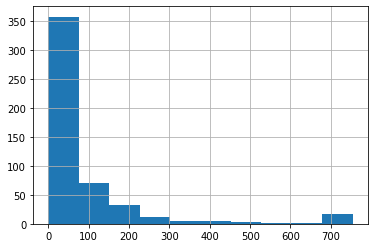

In [12]:
#오차 분포 시각화
Squared_errors.hist()

오차를 그냥 더하면 상쇄되어 0이 되기 때문에 분산과 같이 모두 제곱하여 더 했다. 따라서 그 효과가 강조 되어 있음을 잊지 말아야 한다. 

### 선형관계 측정 

부동산 비즈니스에서는 일반적으로 주택의 크기가 가격에 영향을 준다. 크게 지으면 지을수록 들어가는 건축 자재와 인력 등 비용이 증가하기 때문이다. 따라서 목표에 따라 변하는 변수를 측정하고 상수 값을 기반으로 한 초기 공식을 확장해야 한다. 
통계에는 두 변수가 서로 얼마나 관련이 있고 어떤 방향으로 영향을 주는지 측정하는 데 도움이 되는 '상관관계'가 있다. 

공분산은 2개의 확률변수의 상관정도를 나타내는 것인데 

image.png

위와 같은 식을 통해 구한다. 각 변수의 관측치에서 각 변수의 평균을 뺀 것의 곱의 기대값이다. 따라서 Cov(X, X)는 Var(X)가 된다. 서로 다른 변수 간의 계산이 이루어지기 때문에 각 변수의 단위가 영향을 주게 된다. 예를 들어 cm 단위의 X와 mm 단위의 Y의 공분산을 구했던 것을 그대로 X와 Y 모두 m 단위로 변환하여 구하면 공분산이 작아지게 된다.  

표준정규분포와 마찬가지로 표준화를 통해 변수의 단위를 평균은 0, 표준편차는 1을 갖도록 해준다. 
표준화한 뒤, 각 변수의 차이를 제곱한 것과 평균을 비교한다. 만약 두 개의 차이의 부호가 같다면, 그들의 곱셈의 결과는 양의 값이 된다. 즉 동일한 방향성을 가지고 있다는 의미다. 그러나 만약 부호가 다르다면 그들의 곰셈 결과는 음의 값이 된다. 차이를 제곱한 것들을 곱해서 모두 합한 후 관찰 수로 나누면 -1부터 1 사이의 범위를 갖는 상관계수를 얻을 수 있다. 

피어슨 상관계수는 다음과 같이 구한다. 

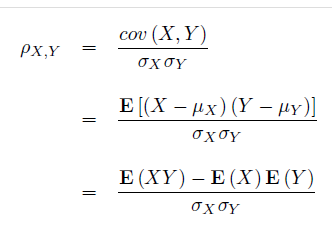

개념을 쉽게 표현하자면 다음과 같다. 

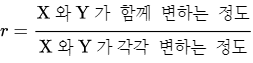




In [13]:
#표준화 구현
def standardize(x):
  return (x-np.mean(x))/np.std(x)

In [14]:
#공분산, 상관계수 구현 
def covariance(variable_1, variable_2, bias=0):
  observation = float(len(variable_1)) #변수의 개수 n
  return np.sum((variable_1-np.mean(variable_1))*(variable_2-np.mean(variable_2)))/(observation-min(bias,1)) #각 변수 관측치에서 평균을 뺀 것의 제곱/자유도

def standardize(variable):
  return (variable-np.mean(variable))/np.std(variable) #표준편차로 차이를 표준화

def correlation(var1, var2, bias=0):
  return covariance(standardize(var1), standardize(var2), bias) #표준화한 variable1과 표준화한 variable2의 공분산이 곧 상관계수인 것을 이용한 코드

from scipy.stats.stats import pearsonr

'Our correlation estimation: %0.5f' % (correlation(dataset['RM'], dataset['target'])) #직접 합수를 정의해서 구한 상관계수
'Correlation from Scipy peasonr estimation: %0.5f' % pearsonr(dataset['RM'], dataset['target'])[0] #라이브러리에 있는 함수를 통해 구한 상관계수와 비교

'Our correlation estimation: 0.69536'

'Correlation from Scipy peasonr estimation: 0.69536'

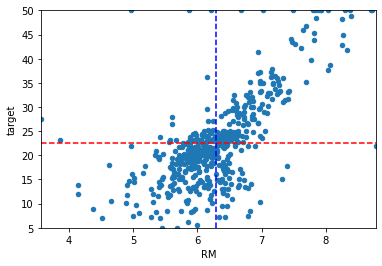

In [15]:
#산점도 

x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)
meanY=scatter_plot.plot(x_range, [dataset['target'].mean(), dataset['target'].mean()], '--', color='red', linewidth=1.5)
meanX=scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', color='blue', linewidth=1.5) #y_range를 앞에 다가 붙이면 y축에 그려짐  
plt.show()

### Statsmodels를 사용한 회귀

Statsmodels는 통계 분석을 염두에 두고 설계된 패키지다. 그러므로 그 기능은 통계적인 검사와 정보에 있어서 풍부한 아웃풋을 제공한다. 확장성은 패키지의 문제가 아니다. 학습을 위해 좋은 출발점이지만 최적화 알고리즘으로 인해 대규모 데이터셋 혹은 빅데이터를 처리해야 하는 경우에는 최적의 솔루션은 아니다. 


*   statsmodels.api: 별개의 예측변수 및 응답변수와 함께 작동하며, 절편을 추가하는 등 예측변수의 변수 변환을 해야 한다. 
*   statsmodels.formula.api: R과 유사한 방법으로 작동하며, 예측변수의 합 공식과 같은 함수 형태를 지정할 수 있다. 



In [16]:
#statsmodels의 두 개의 모듈 모두 업로드
import statsmodels.api as sm
import statsmodels.formula.api as smf

#y와 x 정의
y=dataset['target']
X = dataset['RM']
X = sm.add_constant(X)

X.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [17]:
#선형회귀 계산의 초기화 설정
linear_regression = sm.OLS(y, X)

#회귀계수 베타 벡터의 추정 
fitted_model=linear_regression.fit()

In [18]:
#statsmodels.formula.api를 사용해 같은 결과를 얻는 방법은 아래와 같다. 
linear_regression = smf.ols(formula='target ~ RM', data=dataset)
fitted_model = linear_regression.fit()

#smf.ols는 원본 데이터셋 전체를 허용하기 때문에 제공된 공식을 사용해 어떤 변수를 사용하지 선택하지만 sm.OLS는 예측을 위해 사용되는 특성만을 포함해 행렬을 구성한다. 

In [19]:
#다음 코드는 sm.OLS를 사용한 경우다. 

linear_regression = sm.OLS(y, X)
fitted_model=linear_regression.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Wed, 23 Dec 2020   Prob (F-statistic):           2.49e-74
Time:                        10:03:47   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
fitted_model.params
betas=np.array(fitted_model.params)
fitted_value=fitted_model.predict(X) #절편과 기울기만 간단하게 구할 수 있다. 유의하지 않으면 여기에 출력되지도 않겠지? 

const   -34.670621
RM        9.102109
dtype: float64

### 결정계수
  
표 해석 
*   Dep. Variable: 목표변수, 여기서는 target
*   Model: 적합 모델을 나타낸다. OLS는 선형회귀의 또 다른 방법으로 ordinary least squares의 약어다. 
*   No. Observation: 관측치 개수 n
*   DF Residuals: 잔차의 자유도, 관찰 개수에서 파라미터의 수를 뺀 값
*   DF Model: 모델에서 추정하는 파라미터의 개수를 나타내며, 상수항은 제외한다. 여기서는 단순선형회귀이니 1개가 나왔다.
*   R-squared: 결정계수로, 회귀가 단순평균과 관련해 얼마나 잘 수행하는지 나타낸다. 
*   Adj. R-squared: 모델의 파라미터 개수와 모델 구축에 도움이 된 관찰 개수에 따라 조정된 결정계수를 나타낸다. 
*   F-statistic: 통계적 관점에서 볼 때 편향을 제외한 모든 계수가 0과 다른지 나타내는 척도. **회귀가 단순평균보다 나은지를 보여준다.** 
*   Prob(F-statistic): 실제로 사용한 관찰로 인해 운 좋게 F-statistic에 도달할 확률을 나타내며, F-statistic의 p값이라고 한다. 그 값이 충분히 낮다면 회귀가 단순평균보다 훨씬 더 좋다는 것을 확신할 수 있다. 
*   AIC: 관찰 개수와 모델 자체의 복잡성을 기반으로 모델을 평가하는 점수로, Akaike Information Criterion의 약어다. AIC 점수가 낮을수록 좋다. 
*   BIC: AIC와 유사하게 작동하나 파라미터가 많은 모델에 대해 더 많은 단점을 갖는다. Bayesian Information Criterion의 약어다. 





F-검정통계량은 회귀모델이 단순평균에 비해 좋은지 그 여부만을 알려주지만 R제곱은 회귀모델이 단순평균에 비해 '얼마나' 좋은지에 대해 알려주는 지표이다. 평균에 대해 설명되지 않은 변동의 비율을 예측변수로 제공해 모델이 실제로 설명될 수 있도록 한다. 

직접 측정값을 계산하려면, 목표변수의 평균에 대한 제곱오차의 합계를 계산하면 된다. 

In [21]:
#R제곱 직접 구하기1
mean_sum_squared_errors=np.sum((dataset['target']-dataset['target'].mean())**2)
regr_sum_squared_errors=np.sum((dataset['target']-fitted_value)**2)
(mean_sum_squared_errors-regr_sum_squared_errors)/mean_sum_squared_errors

0.4835254559913341

In [22]:
#R제곱 직접 구하기2
(pearsonr(dataset['RM'], dataset['target'])[0])**2

0.48352545599133434

### 계수의 의미와 중요성

*   std err: 계수 추정치의 표준오차. 값이 크면 클수록 계수 추정치의 불확실성이 높아진다.
*   t값으로 계수의 참값이 0과 다른지 나타내는 척도다. 

표준오차는 예측변수와 응답 사이에 약하거나 불명확한 관계를 나타내기 때문에 매우 중요하다. 표준오차를 베타로 나눈 값이 0.5 이상이면 모델이 정확한 계수 추정치를 제공했다는 사실을 신뢰할 수 없음을 나타낸다.  



### 적합값 평가

다음 사항에 주의하여 잔차가 무작위로 분포되지 않았는지를 파악한다. 
*   평균으로부터 너무 멀리 떨어진 값. 큰 표준화된 잔차는 관측자료를 모델링할 때 심각한 어려움이 있음을 암시한다. 이런 값들을 학습하는 과정에서 회귀계수가 왜곡됐을 수도 있다. 
*   예측변수값에 대해 다른 분산을 고려해야 한다. 선형회귀가 예측변수에 대해 조건부 평균인 경우 역방향 분산은 예측변수가 특정한 값을 가질 때 회귀가 적절하게 작동하지 않는다는 것을 암시한다.
*   잔차 점들의 이상한 모양을 분석하는 데이터에 대해 조금 더 복잡한 모델이 필요함을 나타낸다. 




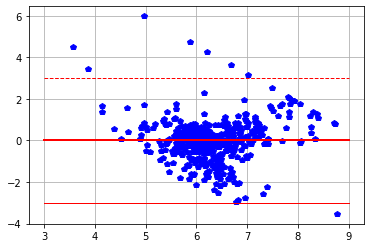

In [27]:
residuals = dataset['target']-fitted_value
normalized_residuals = standardize(residuals)

residual_scatter_plot=plt.plot(dataset['RM'], normalized_residuals, 'bp')
mean_residual=plt.plot([int(x_range[0]), round(x_range[1], 0)], [0,0], '-', color='red', linewidth=2)
upper_bound = plt.plot([int(x_range[0]), round(x_range[1], 0)], [3,3], '--', color='red', linewidth=1)
lower_residual=plt.plot([int(x_range[0]), round(x_range[1], 0)], [-3,-3], '-', color='red', linewidth=1)

plt.grid()
plt.show()

### 상관관계는 인과관계가 아니다. 

상관관계가 곧 인과관계를 의미하는 것은 아니다. 
목표변수가 예측변수에 연관이 돼 있는지는 6가지로 나누어 볼 수 있다.

*   직접적 인과관계

x는 y를 유발한다.
*   상호작용 효과

x는 y를 유발하지만 y에 의해서도 영향을 받는다. 이것은 정책의 효과가 영향을 증대시키거나 감소시키는 거시경제 역학에서 매우 전형적이다. 
*   허위 인과관계

실제로 아예 다른 변수 z가 x와 y를 모두 유발시키는 경우. 예를 들어 값비싼 예술 상점과 미술관의 존재는 주택 가격과 관련이 있는 것처럼 보이지만 실제로는 둘 다 부유한 거주자의 존재에 의해 결정된다. 
*   간접적 인과관계

x가 y를 유발하는 것은 아니지만 x가 유발한 다른 무언가가 y를 유발시키는 경우. 
*   조건부 효과

x는 다른 변수 z의 값에 대해 y를 유발한다. 일례로 z가 일정한 값을 가질 경우에 x는 y에 영향을 미치지 않지만 z가 특정한 값을 취하면 x는 y에 영향을 미치기 시작한다. 이것을 상황 상호작용이라 하고 다른 말로는 조절효과라고도 한다. 예를 들어 범죄율이 낮을 때 지역에 학교가 있는 것은 매력적인 사실이 될 수 있으며, 또한 범죄가 거의 없을 경우에는 주택 가격에 영향을 미친다. 
*   무작위 효과 

x와 y 사이에 기록된 일부 상관관계는 운 좋은 샘플 선택에 기인한다. 실제로 y와 전혀 관계가 없다. 



조건부 효과가 잡히지 않으면 정확한 추정치를 산출하는 모델의 능력을 제한할 수 있다. 무작위 효과는 모델에 발생할 수 있는 최악의 경우지만, 모델의 결과를 검증하기 위해 필요한 모든 조치를 다룰 때 6장, '일반화 달성'에서 설명하는 데이터 과학 프로시저를 따르면 쉽게 피할 수 있다. 








### 회귀모델을 이용한 예측

predict 메소드는 방의 평균 개수를 예측하는 예측변수와 관련해 주택 가격 변동을 시각화하는 이전의 산포도에 맞게 예측을 투사하는 것이다. 

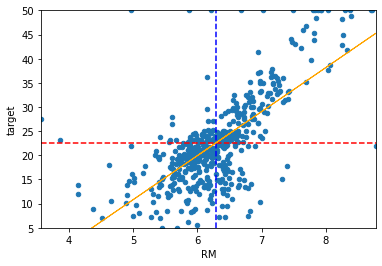

In [28]:
x_range = [dataset['RM'].min(), dataset['RM'].max()]
y_range = [dataset['target'].min(), dataset['target'].max()]
scatter_plot = dataset.plot(kind='scatter', x='RM', y='target', xlim=x_range, ylim=y_range)
meanY=scatter_plot.plot(x_range, [dataset['target'].mean(), dataset['target'].mean()], '--', color='red', linewidth=1.5)
meanX=scatter_plot.plot([dataset['RM'].mean(), dataset['RM'].mean()], y_range, '--', color='blue', linewidth=1.5) 
regression_line=scatter_plot.plot(dataset['RM'], fitted_value, '-', color='orange', linewidth=1)
plt.show()

In [30]:
predictions_by_dot_product=np.dot(X, betas)
"Using the prediction method: %s" % fitted_value[:10]
"Using betas and a dot product: %s" % predictions_by_dot_product[:10]

'Using the prediction method: 0    25.175746\n1    23.774021\n2    30.728032\n3    29.025938\n4    30.382152\n5    23.855940\n6    20.051258\n7    21.507596\n8    16.583355\n9    19.978442\ndtype: float64'

'Using betas and a dot product: [25.17574577 23.77402099 30.72803225 29.02593787 30.38215211 23.85593997\n 20.05125842 21.50759586 16.5833549  19.97844155]'

### Scikit-learn을 사용한 회귀



In [33]:
from sklearn import linear_model
linear_regression = linear_model.LinearRegression(normalize=False, fit_intercept=True)
observation=len(dataset)
X=dataset['RM'].values.reshape((observation, 1)) #X는 항상 벡터가 아닌 행렬이어야 한다. 
y=dataset['target'].values #y는 벡터가 될 수 있다. 

In [34]:
#이전 단계를 모두 완료한 뒤 fit 메소드를 사용해 모델을 적합시킬 수 있다. 
linear_regression.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
#모델을 적합시킨 뒤, 계수 벡터와 편향 상수를 검사한다. 
print(linear_regression.coef_)
print(linear_regression.intercept_)

[9.10210898]
-34.67062077643857


Statsmodels에서 제공한 기능과 비교했을 때 Scikit-learn은 통계적 아웃풋을 거의 제공하지 않는 것으로 보이며, 많은 선형회귀 기능이 제거된 것처럼 보인다. 그러나 실제로는 데이터 과학에서 필요한 것을 정확히 제공하며 대규모의 데이터셋을 다룰 때 완벽하게 빠른 성능을 발휘한다. 


